In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import os
import json

In [2]:
path1=r"D:\z_ipl_json"
list1=os.listdir(path1)

In [4]:
#Fetching ipl data

ipl_data = []

for i1 in list1:
    p1 = os.path.join(path1, i1)

    if os.path.getsize(p1) == 0:
        print(f"Skipping empty file: {p1}")
        continue
    
    try:
        with open(p1, "r") as data1: 
            d1=json.load(data1)

    except json.JSONDecodeError:
        print(f"Skipping invalid JSON file: {p1}")
        continue
    
    info = d1.get("info", {})
    match_date = info.get("dates", [""])[0]
    teams = info.get("teams", ["", ""])
    outcome = info.get("outcome", {})
    winner = outcome.get("winner", "")
    win_by_runs = outcome.get("by", {}).get("runs", 0)
    win_by_wickets = outcome.get("by", {}).get("wickets", 0)

    match_between = f"{teams[0]} vs {teams[1]}"


    for inning in d1["innings"]:
        batting_team = inning["team"]
        
        for over in inning["overs"]:
            for delivery in over["deliveries"]:
                batter = delivery.get("batter")
                bowler = delivery.get("bowler")
                non_striker = delivery.get("non_striker")


                runs_info = delivery.get("runs", {})                
                runs_batter = runs_info.get("batter", 0)
                runs_extras = runs_info.get("extras", 0)
                runs_total = runs_info.get("total", 0)


                extras_info = delivery.get("extras", {})
                legbyes = extras_info.get("legbyes", 0)
                wides = extras_info.get("wides", 0)

                wicket_info = delivery.get("wickets", {})
                wicket_taken = "No"
                
                if wicket_info:
                    wicket_taken = "Yes"
        
                ipl_data.append({"match_type": "IPL", "match_date": match_date, "match_between": match_between, "batter": batter, "bowler": bowler, "non_striker": non_striker, "runs_batter": runs_batter, "runs_extras": runs_extras, "runs_total": runs_total, "legbyes": legbyes, "wides": wides, "wickets": wicket_taken, "match_winner": winner, "win_by_runs": win_by_runs, "win_by_wickets": win_by_wickets})
ipl_df = pd.DataFrame(ipl_data)
ipl_df

Skipping invalid JSON file: D:\z_ipl_json\README.txt


,match_type,match_date,match_between,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,legbyes,wides,wickets,match_winner,win_by_runs,win_by_wickets
0,IPL,2017-04-05,Sunrisers Hyderabad vs Royal Challengers Banga...,DA Warner,TS Mills,S Dhawan,0,0,0,0,0,No,Sunrisers Hyderabad,35,0
1,IPL,2017-04-05,Sunrisers Hyderabad vs Royal Challengers Banga...,DA Warner,TS Mills,S Dhawan,0,0,0,0,0,No,Sunrisers Hyderabad,35,0
2,IPL,2017-04-05,Sunrisers Hyderabad vs Royal Challengers Banga...,DA Warner,TS Mills,S Dhawan,4,0,4,0,0,No,Sunrisers Hyderabad,35,0
3,IPL,2017-04-05,Sunrisers Hyderabad vs Royal Challengers Banga...,DA Warner,TS Mills,S Dhawan,0,0,0,0,0,No,Sunrisers Hyderabad,35,0
4,IPL,2017-04-05,Sunrisers Hyderabad vs Royal Challengers Banga...,DA Warner,TS Mills,S Dhawan,0,2,2,0,2,No,Sunrisers Hyderabad,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227959,IPL,2014-04-19,Kolkata Knight Riders vs Delhi Daredevils,JDS Neesham,SP Narine,JP Duminy,0,3,3,3,0,No,Delhi Daredevils,0,4
227960,IPL,2014-04-19,Kolkata Knight Riders vs Delhi Daredevils,JP Duminy,SP Narine,JDS Neesham,0,0,0,0,0,No,Delhi Daredevils,0,4
227961,IPL,2014-04-19,Kolkata Knight Riders vs Delhi Daredevils,JDS Neesham,PP Chawla,JP Duminy,0,0,0,0,0,No,Delhi Daredevils,0,4
227962,IPL,2014-04-19,Kolkata Knight Riders vs Delhi Daredevils,JDS Neesham,PP Chawla,JP Duminy,0,0,0,0,0,Yes,Delhi Daredevils,0,4


In [6]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227964 entries, 0 to 227963
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   match_type      227964 non-null  object
 1   match_date      227964 non-null  object
 2   match_between   227964 non-null  object
 3   batter          227964 non-null  object
 4   bowler          227964 non-null  object
 5   non_striker     227964 non-null  object
 6   runs_batter     227964 non-null  int64 
 7   runs_extras     227964 non-null  int64 
 8   runs_total      227964 non-null  int64 
 9   legbyes         227964 non-null  int64 
 10  wides           227964 non-null  int64 
 11  wickets         227964 non-null  object
 12  match_winner    227964 non-null  object
 13  win_by_runs     227964 non-null  int64 
 14  win_by_wickets  227964 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 26.1+ MB


In [7]:
ipl_df.shape

(227964, 15)

In [8]:
ipl_df.describe()

,runs_batter,runs_extras,runs_total,legbyes,wides,win_by_runs,win_by_wickets
count,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000,227964.000000
mean,1.269722,0.068278,1.338001,0.019516,0.039423,14.092620,3.147971
std,1.646411,0.344242,1.633322,0.189708,0.256675,23.112606,3.338968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000
max,6.000000,5.000000,7.000000,5.000000,5.000000,146.000000,10.000000


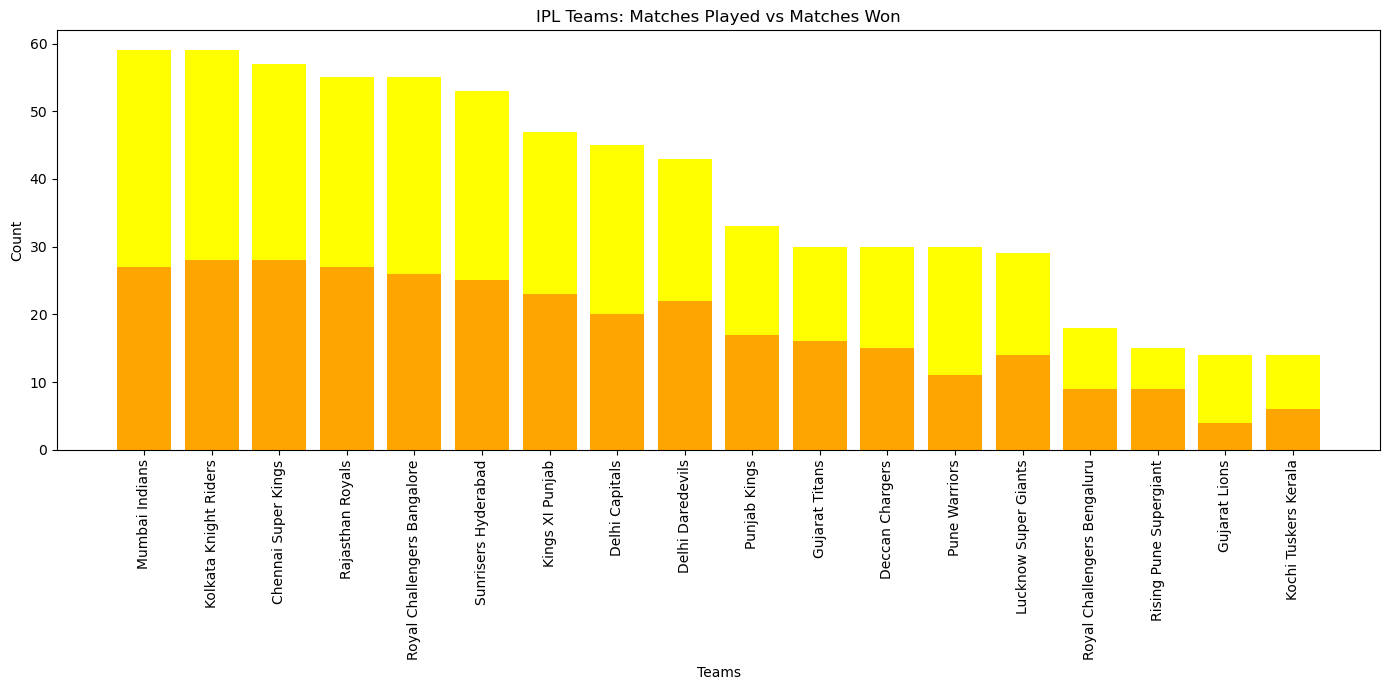

In [5]:
from collections import Counter

unique_matches = ipl_df[['match_between', 'match_winner']].drop_duplicates()

teams_split = unique_matches['match_between'].str.split(' vs ', expand=True)
played = list(teams_split[0]) + list(teams_split[1])
matches_played = Counter(played)

matches_won = unique_matches['match_winner'].value_counts()

ipl_stats_df = pd.DataFrame({
    'Team': list(matches_played.keys()),
    'Matches Played': [matches_played[t] for t in matches_played.keys()],
    'Matches Won': [matches_won.get(t, 0) for t in matches_played.keys()]

    })

ipl_stats_df = ipl_stats_df.sort_values(by='Matches Played', ascending=False)
ipl_stats_df['Matches Lost'] = ipl_stats_df['Matches Played'] - ipl_stats_df['Matches Won']

plt.figure(figsize=(14,7))
plt.bar(ipl_stats_df['Team'], ipl_stats_df['Matches Won'], label='Matches Won', color='orange')
plt.bar(ipl_stats_df['Team'], ipl_stats_df['Matches Lost'], bottom=ipl_stats_df['Matches Won'], label='Matches Lost', color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('IPL Teams: Matches Played vs Matches Won')
plt.tight_layout()
plt.show()

In [16]:
ipl_top_scorers = (
    ipl_df.groupby("batter")["runs_batter"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"batter": "Player", "runs_batter": "Total Runs"})
)

display(ipl_top_scorers)

,Player,Total Runs
0,V Kohli,6474
1,S Dhawan,5576
2,RG Sharma,5354
3,DA Warner,4661
4,MS Dhoni,4372
5,SK Raina,4264
6,KL Rahul,4249
7,KD Karthik,4098
8,CH Gayle,4083
9,SV Samson,3812


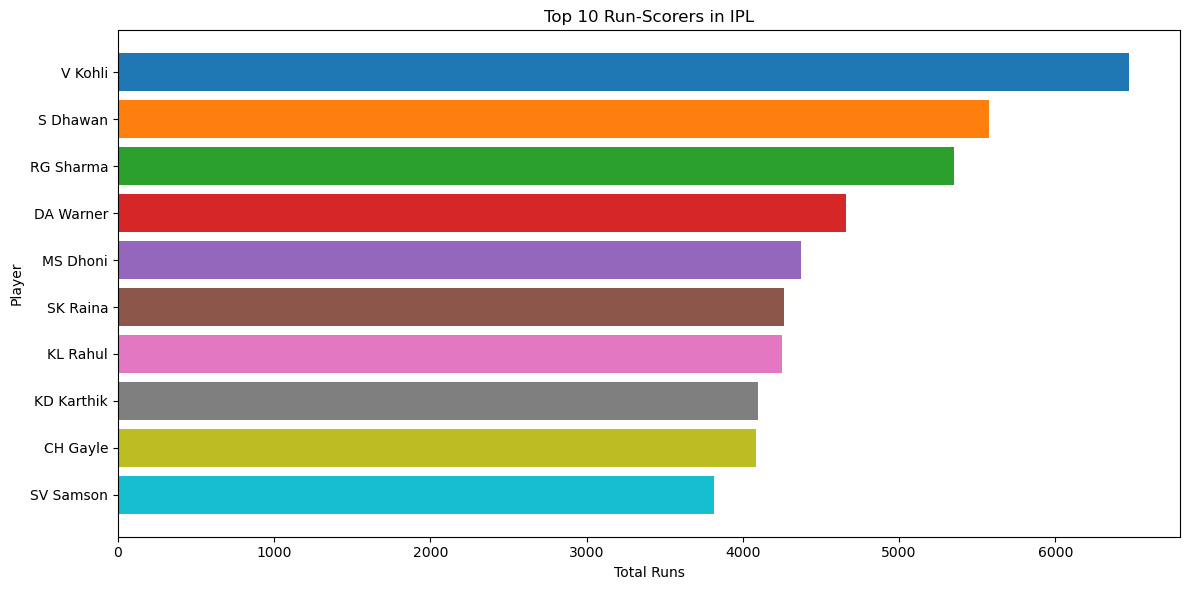

In [17]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(12,6))
plt.barh(top_scorers["Player"], top_scorers["Total Runs"], color=colors)
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.title("Top 10 Run-Scorers in IPL")
plt.gca().invert_yaxis()  # Highest scorer on top
plt.tight_layout()
plt.show()

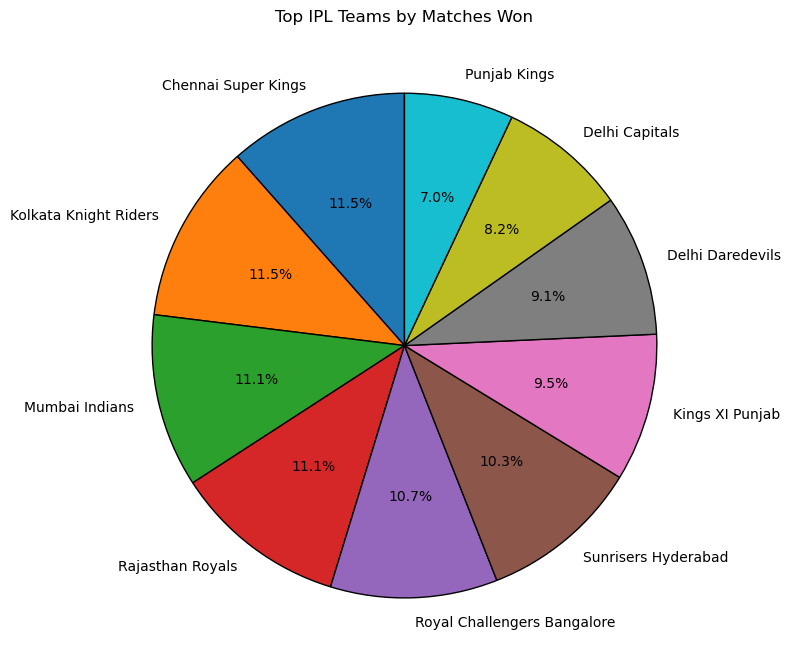

In [58]:
unique_matches = ipl_df[['match_between', 'match_winner']].drop_duplicates()
ipl_team_wins = unique_matches['match_winner'].value_counts()
ipl_top_teams = ipl_team_wins.head(10)
plt.figure(figsize=(8,8))
plt.pie(
    ipl_top_teams,
    labels=ipl_top_teams.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top IPL Teams by Matches Won')
plt.tight_layout()
plt.show()

In [19]:
path2=r"D:\z_odis_json"
list2=os.listdir(path2)

In [20]:
#Fetching odi data

odi_data = []

for i2 in list2:
    p2 = os.path.join(path2, i2)

    if os.path.getsize(p2) == 0:
        print(f"Skipping empty file: {p2}")
        continue
    
    try:
        with open(p2, "r") as data2: 
            d2=json.load(data2)

    except json.JSONDecodeError:
        print(f"Skipping invalid JSON file: {p2}")
        continue
    
    info = d2.get("info", {})
    match_date = info.get("dates", [""])[0]
    teams = info.get("teams", ["", ""])
    outcome = info.get("outcome", {})
    winner = outcome.get("winner", "")
    win_by_runs = outcome.get("by", {}).get("runs", 0)
    win_by_wickets = outcome.get("by", {}).get("wickets", 0)

    match_between = f"{teams[0]} vs {teams[1]}"


    for inning in d2["innings"]:
        batting_team = inning["team"]
        
        for over in inning["overs"]:
            for delivery in over["deliveries"]:
                batter = delivery.get("batter")
                bowler = delivery.get("bowler")
                non_striker = delivery.get("non_striker")


                runs_info = delivery.get("runs", {})                
                runs_batter = runs_info.get("batter", 0)
                runs_extras = runs_info.get("extras", 0)
                runs_total = runs_info.get("total", 0)


                extras_info = delivery.get("extras", {})
                legbyes = extras_info.get("legbyes", 0)
                wides = extras_info.get("wides", 0)

                wicket_info = delivery.get("wickets", {})
                wicket_taken = "No"
                
                if wicket_info:
                    wicket_taken = "Yes"
        
                odi_data.append({"match_type": "ODI", "match_date": match_date, "match_between": match_between, "batter": batter, "bowler": bowler, "non_striker": non_striker, "runs_batter": runs_batter, "runs_extras": runs_extras, "runs_total": runs_total, "legbyes": legbyes, "wides": wides, "wickets": wicket_taken, "match_winner": winner, "win_by_runs": win_by_runs, "win_by_wickets": win_by_wickets})
odi_df = pd.DataFrame(odi_data)
odi_df

Skipping invalid JSON file: D:\z_odis_json\README.txt


,match_type,match_date,match_between,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,legbyes,wides,wickets,match_winner,win_by_runs,win_by_wickets
0,ODI,2017-01-13,Australia vs Pakistan,DA Warner,Mohammad Amir,TM Head,0,0,0,0,0,No,Australia,92,0
1,ODI,2017-01-13,Australia vs Pakistan,DA Warner,Mohammad Amir,TM Head,0,0,0,0,0,No,Australia,92,0
2,ODI,2017-01-13,Australia vs Pakistan,DA Warner,Mohammad Amir,TM Head,0,0,0,0,0,No,Australia,92,0
3,ODI,2017-01-13,Australia vs Pakistan,DA Warner,Mohammad Amir,TM Head,0,0,0,0,0,No,Australia,92,0
4,ODI,2017-01-13,Australia vs Pakistan,DA Warner,Mohammad Amir,TM Head,0,1,1,0,1,No,Australia,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413954,ODI,2022-06-14,Sri Lanka vs Australia,GJ Maxwell,DN Wellalage,JA Richardson,1,0,1,0,0,No,Australia,0,2
413955,ODI,2022-06-14,Sri Lanka vs Australia,JA Richardson,DN Wellalage,GJ Maxwell,0,0,0,0,0,No,Australia,0,2
413956,ODI,2022-06-14,Sri Lanka vs Australia,GJ Maxwell,PVD Chameera,JA Richardson,0,0,0,0,0,No,Australia,0,2
413957,ODI,2022-06-14,Sri Lanka vs Australia,GJ Maxwell,PVD Chameera,JA Richardson,6,0,6,0,0,No,Australia,0,2


In [23]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413959 entries, 0 to 413958
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   match_type      413959 non-null  object
 1   match_date      413959 non-null  object
 2   match_between   413959 non-null  object
 3   batter          413959 non-null  object
 4   bowler          413959 non-null  object
 5   non_striker     413959 non-null  object
 6   runs_batter     413959 non-null  int64 
 7   runs_extras     413959 non-null  int64 
 8   runs_total      413959 non-null  int64 
 9   legbyes         413959 non-null  int64 
 10  wides           413959 non-null  int64 
 11  wickets         413959 non-null  object
 12  match_winner    413959 non-null  object
 13  win_by_runs     413959 non-null  int64 
 14  win_by_wickets  413959 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 47.4+ MB


In [24]:
odi_df.shape

(413959, 15)

In [27]:
odi_df.describe()

,runs_batter,runs_extras,runs_total,legbyes,wides,win_by_runs,win_by_wickets
count,413959.000000,413959.000000,413959.000000,413959.000000,413959.000000,413959.000000,413959.000000
mean,0.784283,0.044350,0.828633,0.011086,0.027805,35.025411,2.773813
std,1.248683,0.279224,1.253856,0.144939,0.215364,53.536816,3.242004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,60.000000,6.000000
max,6.000000,5.000000,7.000000,5.000000,5.000000,306.000000,10.000000


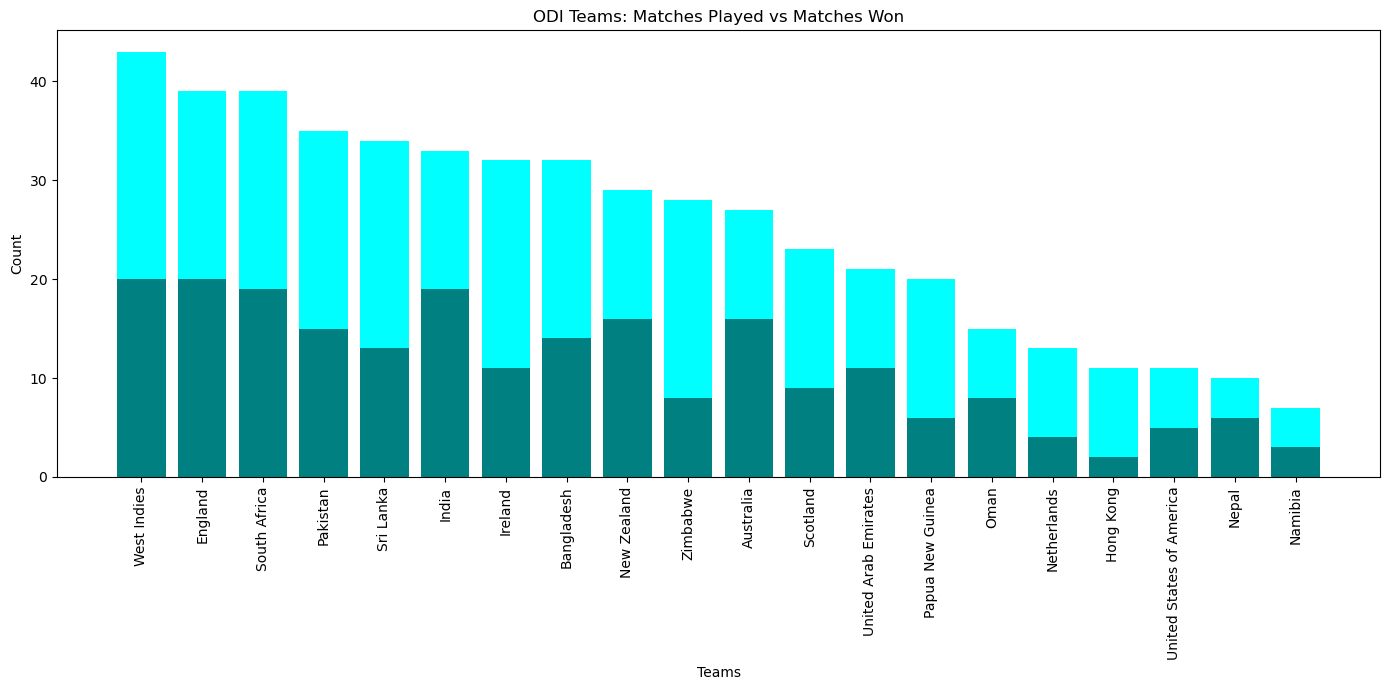

In [56]:
unique_matches = odi_df[['match_between', 'match_winner']].drop_duplicates()

teams_split = unique_matches['match_between'].str.split(' vs ', expand=True)
played = list(teams_split[0]) + list(teams_split[1])
matches_played = Counter(played)

matches_won = unique_matches['match_winner'].value_counts()

odi_stats_df = pd.DataFrame({
    'Team': list(matches_played.keys()),
    'Matches Played': [matches_played[t] for t in matches_played.keys()],
    'Matches Won': [matches_won.get(t, 0) for t in matches_played.keys()]

    })

odi_stats_df = odi_stats_df.sort_values(by='Matches Played', ascending=False)
odi_stats_df['Matches Lost'] = odi_stats_df['Matches Played'] - odi_stats_df['Matches Won']

plt.figure(figsize=(14,7))
plt.bar(odi_stats_df['Team'], odi_stats_df['Matches Won'], label='Matches Won', color='teal')
plt.bar(odi_stats_df['Team'], odi_stats_df['Matches Lost'], bottom=odi_stats_df['Matches Won'], label='Matches Lost', color='cyan')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('ODI Teams: Matches Played vs Matches Won')
plt.tight_layout()
plt.show()

In [21]:
odi_top_scorers = (
    odi_df.groupby("batter")["runs_batter"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"batter": "Player", "runs_batter": "Total Runs"})
)

display(odi_top_scorers)

,Player,Total Runs
0,V Kohli,5065
1,RG Sharma,4367
2,Babar Azam,3624
3,SD Hope,3444
4,S Dhawan,3247
5,JE Root,3073
6,JM Bairstow,3031
7,JJ Roy,2865
8,LRPL Taylor,2852
9,Tamim Iqbal,2828


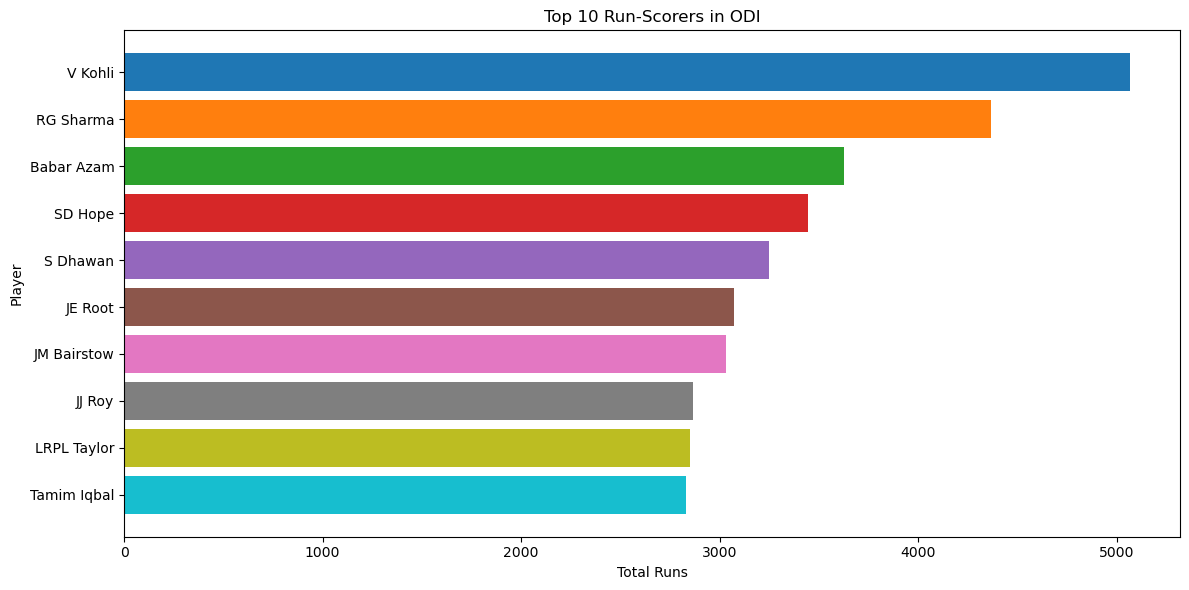

In [22]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(12,6))
plt.barh(odi_top_scorers["Player"], odi_top_scorers["Total Runs"], color=colors)
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.title("Top 10 Run-Scorers in ODI")
plt.gca().invert_yaxis()  # Highest scorer on top
plt.tight_layout()
plt.show()

In [68]:
print(odi_top_teams)

match_winner
                26
West Indies     20
England         20
India           19
South Africa    19
Australia       16
New Zealand     16
Pakistan        15
Bangladesh      14
Sri Lanka       13
Name: count, dtype: int64


In [69]:
print(odi_unique_matches['match_winner'].unique())

['Australia' 'Pakistan' '' 'Scotland' 'India' 'New Zealand' 'South Africa'
 'England' 'Sri Lanka' 'Bangladesh' 'Hong Kong' 'Papua New Guinea'
 'West Indies' 'Zimbabwe' 'United Arab Emirates' 'Ireland' 'Nepal'
 'Namibia' 'Netherlands' 'Oman' 'United States of America']


In [71]:
odi_unique_matches_clean = odi_unique_matches[odi_unique_matches['match_winner'] != '']

In [72]:
print(odi_unique_matches_clean['match_winner'].unique())

['Australia' 'Pakistan' 'Scotland' 'India' 'New Zealand' 'South Africa'
 'England' 'Sri Lanka' 'Bangladesh' 'Hong Kong' 'Papua New Guinea'
 'West Indies' 'Zimbabwe' 'United Arab Emirates' 'Ireland' 'Nepal'
 'Namibia' 'Netherlands' 'Oman' 'United States of America']


match_winner
England                 20
West Indies             20
India                   19
South Africa            19
Australia               16
New Zealand             16
Pakistan                15
Bangladesh              14
Sri Lanka               13
United Arab Emirates    11
Name: count, dtype: int64


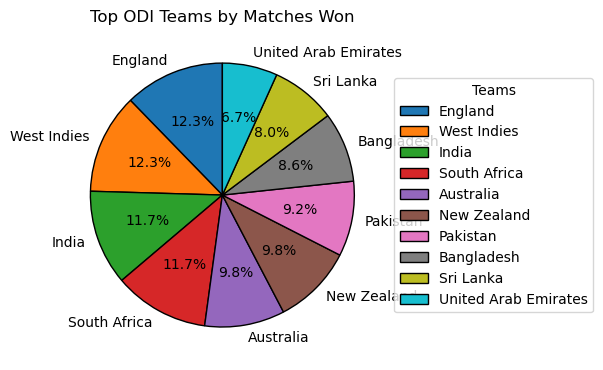

In [73]:
# Count wins per team
odi_team_wins_clean = odi_unique_matches_clean['match_winner'].value_counts()

# Take top 10 teams by wins
odi_top_teams_clean = odi_team_wins_clean.head(10)
print(odi_top_teams_clean)

# Plot pie chart
fig, ax = plt.subplots(figsize=(6,8))
wedges, texts, autotexts = ax.pie(
    odi_top_teams_clean.values,
    labels=odi_top_teams_clean.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

ax.legend(
    odi_top_teams_clean.index,
    title="Teams",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title('Top ODI Teams by Matches Won')
plt.tight_layout()
plt.show()

In [32]:
path3=r"D:\z_t20s_json"
list3=os.listdir(path3)

In [33]:
#Fetching t20 data

t20_data = []


for i3 in list3:
    p3 = os.path.join(path3, i3)

    if os.path.getsize(p3) == 0:
        print(f"Skipping empty file: {p3}")
        continue
    
    try:
        with open(p3, "r") as data3: 
            d3=json.load(data3)

    except json.JSONDecodeError:
        print(f"Skipping invalid JSON file: {p3}")
        continue
    
    info = d3.get("info", {})
    match_date = info.get("dates", [""])[0]
    teams = info.get("teams", ["", ""])
    outcome = info.get("outcome", {})
    winner = outcome.get("winner", "")
    win_by_runs = outcome.get("by", {}).get("runs", 0)
    win_by_wickets = outcome.get("by", {}).get("wickets", 0)

    match_between = f"{teams[0]} vs {teams[1]}"


    for inning in d3["innings"]:
        batting_team = inning["team"]
        
        for over in inning["overs"]:
            for delivery in over["deliveries"]:
                batter = delivery.get("batter")
                bowler = delivery.get("bowler")
                non_striker = delivery.get("non_striker")


                runs_info = delivery.get("runs", {})                
                runs_batter = runs_info.get("batter", 0)
                runs_extras = runs_info.get("extras", 0)
                runs_total = runs_info.get("total", 0)


                extras_info = delivery.get("extras", {})
                legbyes = extras_info.get("legbyes", 0)
                wides = extras_info.get("wides", 0)

                wicket_info = delivery.get("wickets", {})
                wicket_taken = "No"
                
                if wicket_info:
                    wicket_taken = "Yes"
        
                t20_data.append({"match_type": "T20", "match_date": match_date, "match_between": match_between, "batter": batter, "bowler": bowler, "non_striker": non_striker, "runs_batter": runs_batter, "runs_extras": runs_extras, "runs_total": runs_total, "legbyes": legbyes, "wides": wides, "wickets": wicket_taken, "match_winner": winner, "win_by_runs": win_by_runs, "win_by_wickets": win_by_wickets})
t20_df = pd.DataFrame(t20_data)
t20_df

Skipping invalid JSON file: D:\z_t20s_json\README.txt


,match_type,match_date,match_between,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,legbyes,wides,wickets,match_winner,win_by_runs,win_by_wickets
0,T20,2017-02-17,Australia vs Sri Lanka,AJ Finch,SL Malinga,M Klinger,0,0,0,0,0,No,Sri Lanka,0,5
1,T20,2017-02-17,Australia vs Sri Lanka,AJ Finch,SL Malinga,M Klinger,0,0,0,0,0,No,Sri Lanka,0,5
2,T20,2017-02-17,Australia vs Sri Lanka,AJ Finch,SL Malinga,M Klinger,1,0,1,0,0,No,Sri Lanka,0,5
3,T20,2017-02-17,Australia vs Sri Lanka,M Klinger,SL Malinga,AJ Finch,2,0,2,0,0,No,Sri Lanka,0,5
4,T20,2017-02-17,Australia vs Sri Lanka,M Klinger,SL Malinga,AJ Finch,0,0,0,0,0,No,Sri Lanka,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153261,T20,2020-02-23,Malaysia vs Hong Kong,Ehsan Khan,S Muniandy,SS McKechnie,6,0,6,0,0,No,Malaysia,8,0
153262,T20,2020-02-23,Malaysia vs Hong Kong,Ehsan Khan,S Muniandy,SS McKechnie,0,1,1,1,0,No,Malaysia,8,0
153263,T20,2020-02-23,Malaysia vs Hong Kong,SS McKechnie,S Muniandy,Ehsan Khan,1,0,1,0,0,No,Malaysia,8,0
153264,T20,2020-02-23,Malaysia vs Hong Kong,Ehsan Khan,S Muniandy,SS McKechnie,6,0,6,0,0,No,Malaysia,8,0


In [35]:
t20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153266 entries, 0 to 153265
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   match_type      153266 non-null  object
 1   match_date      153266 non-null  object
 2   match_between   153266 non-null  object
 3   batter          153266 non-null  object
 4   bowler          153266 non-null  object
 5   non_striker     153266 non-null  object
 6   runs_batter     153266 non-null  int64 
 7   runs_extras     153266 non-null  int64 
 8   runs_total      153266 non-null  int64 
 9   legbyes         153266 non-null  int64 
 10  wides           153266 non-null  int64 
 11  wickets         153266 non-null  object
 12  match_winner    153266 non-null  object
 13  win_by_runs     153266 non-null  int64 
 14  win_by_wickets  153266 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 17.5+ MB


In [36]:
t20_df.shape

(153266, 15)

In [37]:
t20_df.describe()

,runs_batter,runs_extras,runs_total,legbyes,wides,win_by_runs,win_by_wickets
count,153266.000000,153266.000000,153266.000000,153266.000000,153266.000000,153266.000000,153266.000000
mean,1.048047,0.072019,1.120066,0.015607,0.045894,24.128215,2.911859
std,1.450352,0.345177,1.443164,0.166143,0.273125,35.215326,3.487914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,40.000000,6.000000
max,6.000000,5.000000,7.000000,5.000000,5.000000,249.000000,10.000000


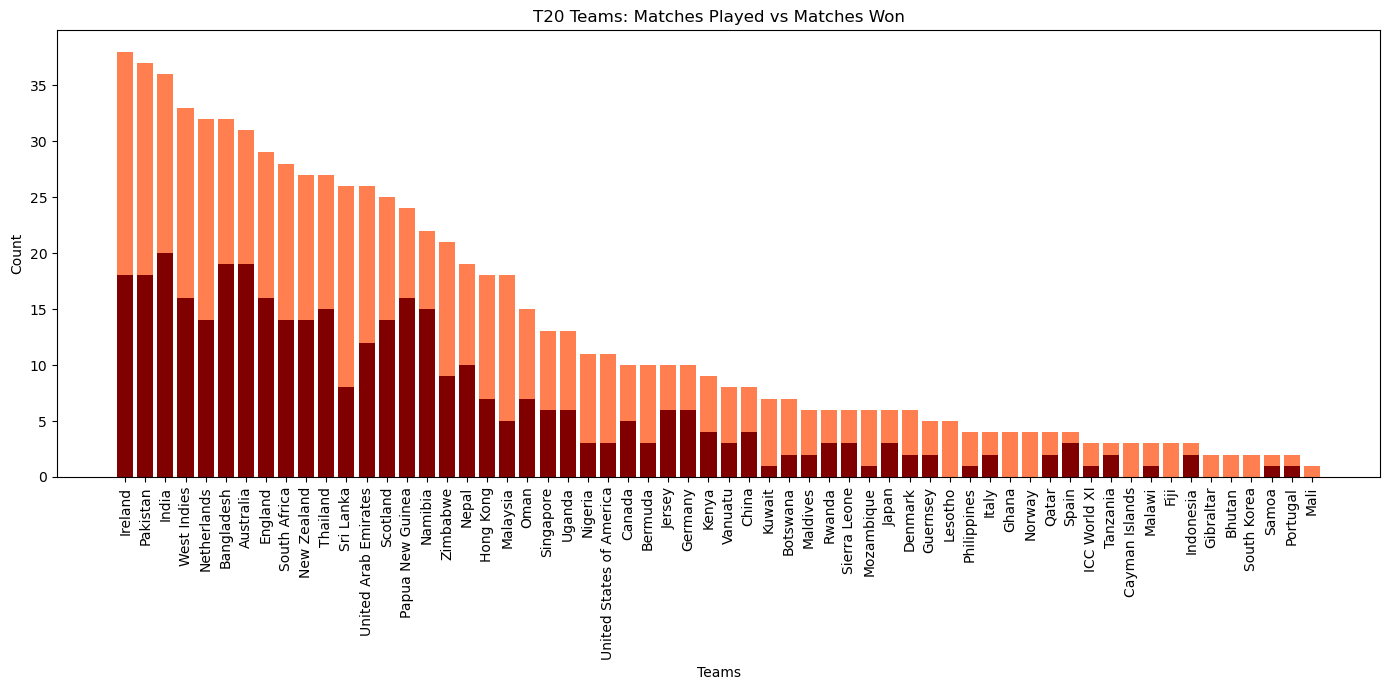

In [54]:
unique_matches = t20_df[['match_between', 'match_winner']].drop_duplicates()

teams_split = unique_matches['match_between'].str.split(' vs ', expand=True)
played = list(teams_split[0]) + list(teams_split[1])
matches_played = Counter(played)

matches_won = unique_matches['match_winner'].value_counts()

t20_stats_df = pd.DataFrame({
    'Team': list(matches_played.keys()),
    'Matches Played': [matches_played[t] for t in matches_played.keys()],
    'Matches Won': [matches_won.get(t, 0) for t in matches_played.keys()]

    })

t20_stats_df = t20_stats_df.sort_values(by='Matches Played', ascending=False)
t20_stats_df['Matches Lost'] = t20_stats_df['Matches Played'] - t20_stats_df['Matches Won']

plt.figure(figsize=(14,7))
plt.bar(t20_stats_df['Team'], t20_stats_df['Matches Won'], label='Matches Won', color='maroon')
plt.bar(t20_stats_df['Team'], t20_stats_df['Matches Lost'], bottom=t20_stats_df['Matches Won'], label='Matches Lost', color='coral')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('T20 Teams: Matches Played vs Matches Won')
plt.tight_layout()
plt.show()

In [38]:
t20_top_scorers = (
    t20_df.groupby("batter")["runs_batter"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"batter": "Player", "runs_batter": "Total Runs"})
)

display(t20_top_scorers)

,Player,Total Runs
0,Babar Azam,1533
1,RG Sharma,1496
2,KL Rahul,1476
3,BL Mooney,1348
4,S Mandhana,1298
5,AJ Healy,1268
6,C Munro,1229
7,SFM Devine,1186
8,S Dhawan,1172
9,V Kohli,1159


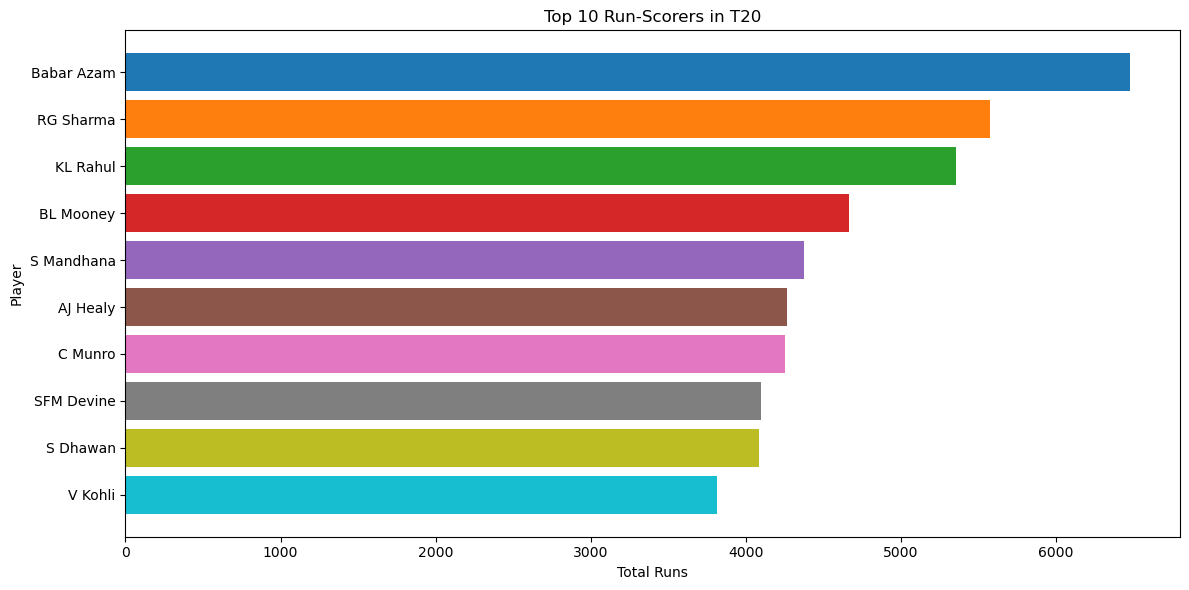

In [39]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(12,6))
plt.barh(t20_top_scorers["Player"], top_scorers["Total Runs"], color=colors)
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.title("Top 10 Run-Scorers in T20")
plt.gca().invert_yaxis()  # Highest scorer on top
plt.tight_layout()
plt.show()

In [41]:
path4=r"D:\z_tests_json"
list4=os.listdir(path4)

In [42]:
#Fetching test data

test_data = []


for i4 in list4:
    p4 = os.path.join(path4, i4)

    if os.path.getsize(p4) == 0:
        print(f"Skipping empty file: {p4}")
        continue
    
    try:
        with open(p4, "r") as data4: 
            d4=json.load(data4)

    except json.JSONDecodeError:
        print(f"Skipping invalid JSON file: {p4}")
        continue
    
    info = d4.get("info", {})
    match_date = info.get("dates", [""])[0]
    teams = info.get("teams", ["", ""])
    outcome = info.get("outcome", {})
    winner = outcome.get("winner", "")
    win_by_runs = outcome.get("by", {}).get("runs", 0)
    win_by_wickets = outcome.get("by", {}).get("wickets", 0)

    match_between = f"{teams[0]} vs {teams[1]}"


    for inning in d4["innings"]:
        batting_team = inning["team"]
        
        for over in inning["overs"]:
            for delivery in over["deliveries"]:
                batter = delivery.get("batter")
                bowler = delivery.get("bowler")
                non_striker = delivery.get("non_striker")


                runs_info = delivery.get("runs", {})                
                runs_batter = runs_info.get("batter", 0)
                runs_extras = runs_info.get("extras", 0)
                runs_total = runs_info.get("total", 0)


                extras_info = delivery.get("extras", {})
                legbyes = extras_info.get("legbyes", 0)
                wides = extras_info.get("wides", 0)

                wicket_info = delivery.get("wickets", {})
                wicket_taken = "No"
                
                if wicket_info:
                    wicket_taken = "Yes"
        
                test_data.append({"match_type": "Test", "match_date": match_date, "match_between": match_between, "batter": batter, "bowler": bowler, "non_striker": non_striker, "runs_batter": runs_batter, "runs_extras": runs_extras, "runs_total": runs_total, "legbyes": legbyes, "wides": wides, "wickets": wicket_taken, "match_winner": winner, "win_by_runs": win_by_runs, "win_by_wickets": win_by_wickets})
test_df = pd.DataFrame(test_data)
test_df

Skipping invalid JSON file: D:\z_tests_json\README.txt


,match_type,match_date,match_between,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,legbyes,wides,wickets,match_winner,win_by_runs,win_by_wickets
0,Test,2016-11-03,Australia vs South Africa,SC Cook,MA Starc,D Elgar,0,0,0,0,0,No,South Africa,177,0
1,Test,2016-11-03,Australia vs South Africa,SC Cook,MA Starc,D Elgar,0,0,0,0,0,No,South Africa,177,0
2,Test,2016-11-03,Australia vs South Africa,SC Cook,MA Starc,D Elgar,0,0,0,0,0,No,South Africa,177,0
3,Test,2016-11-03,Australia vs South Africa,SC Cook,MA Starc,D Elgar,0,0,0,0,0,Yes,South Africa,177,0
4,Test,2016-11-03,Australia vs South Africa,HM Amla,MA Starc,D Elgar,0,0,0,0,0,No,South Africa,177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683109,Test,2016-08-13,Sri Lanka vs Australia,JM Holland,MDK Perera,NM Lyon,0,0,0,0,0,No,Sri Lanka,163,0
1683110,Test,2016-08-13,Sri Lanka vs Australia,JM Holland,MDK Perera,NM Lyon,0,0,0,0,0,No,Sri Lanka,163,0
1683111,Test,2016-08-13,Sri Lanka vs Australia,JM Holland,MDK Perera,NM Lyon,0,0,0,0,0,No,Sri Lanka,163,0
1683112,Test,2016-08-13,Sri Lanka vs Australia,JM Holland,MDK Perera,NM Lyon,0,0,0,0,0,No,Sri Lanka,163,0


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683114 entries, 0 to 1683113
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   match_type      1683114 non-null  object
 1   match_date      1683114 non-null  object
 2   match_between   1683114 non-null  object
 3   batter          1683114 non-null  object
 4   bowler          1683114 non-null  object
 5   non_striker     1683114 non-null  object
 6   runs_batter     1683114 non-null  int64 
 7   runs_extras     1683114 non-null  int64 
 8   runs_total      1683114 non-null  int64 
 9   legbyes         1683114 non-null  int64 
 10  wides           1683114 non-null  int64 
 11  wickets         1683114 non-null  object
 12  match_winner    1683114 non-null  object
 13  win_by_runs     1683114 non-null  int64 
 14  win_by_wickets  1683114 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 192.6+ MB


In [45]:
test_df.shape

(1683114, 15)

In [47]:
test_df.describe()

,runs_batter,runs_extras,runs_total,legbyes,wides,win_by_runs,win_by_wickets
count,1.683114e+06,1.683114e+06,1.683114e+06,1.683114e+06,1.683114e+06,1.683114e+06,1.683114e+06
mean,5.114960e-01,2.788344e-02,5.393794e-01,1.031778e-02,3.279635e-03,8.238870e+01,1.681233e+00
std,1.106769e+00,2.562504e-01,1.126253e+00,1.546893e-01,8.965832e-02,1.056810e+02,3.186334e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00
75%,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.520000e+02,0.000000e+00
max,8.000000e+00,6.000000e+00,8.000000e+00,5.000000e+00,5.000000e+00,4.920000e+02,1.000000e+01


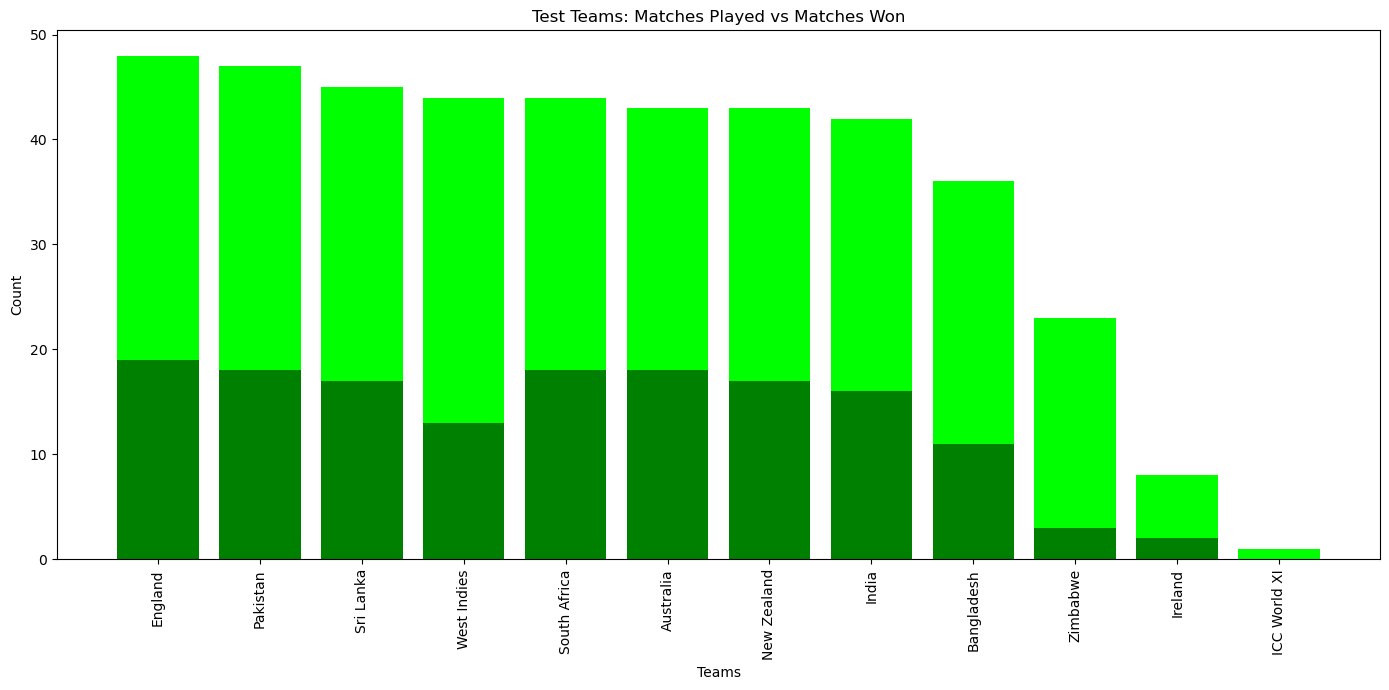

In [43]:
unique_matches = test_df[['match_between', 'match_winner']].drop_duplicates()

teams_split = unique_matches['match_between'].str.split(' vs ', expand=True)
played = list(teams_split[0]) + list(teams_split[1])
matches_played = Counter(played)

matches_won = unique_matches['match_winner'].value_counts()

test_stats_df = pd.DataFrame({
    'Team': list(matches_played.keys()),
    'Matches Played': [matches_played[t] for t in matches_played.keys()],
    'Matches Won': [matches_won.get(t, 0) for t in matches_played.keys()]

    })

test_stats_df = test_stats_df.sort_values(by='Matches Played', ascending=False)
test_stats_df['Matches Lost'] = test_stats_df['Matches Played'] - test_stats_df['Matches Won']

plt.figure(figsize=(14,7))
plt.bar(test_stats_df['Team'], test_stats_df['Matches Won'], label='Matches Won', color='green')
plt.bar(test_stats_df['Team'], test_stats_df['Matches Lost'], bottom=test_stats_df['Matches Won'], label='Matches Lost', color='lime')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Test Teams: Matches Played vs Matches Won')
plt.tight_layout()
plt.show()

In [46]:
test_top_scorers = (
    test_df.groupby("batter")["runs_batter"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={"batter": "Player", "runs_batter": "Total Runs"})
)

display(test_top_scorers)

,Player,Total Runs
0,JE Root,13087
1,AN Cook,12472
2,SPD Smith,10350
3,KS Williamson,9276
4,V Kohli,9230
5,HM Amla,9146
6,DA Warner,8786
7,KC Sangakkara,8489
8,AB de Villiers,8182
9,AD Mathews,8073


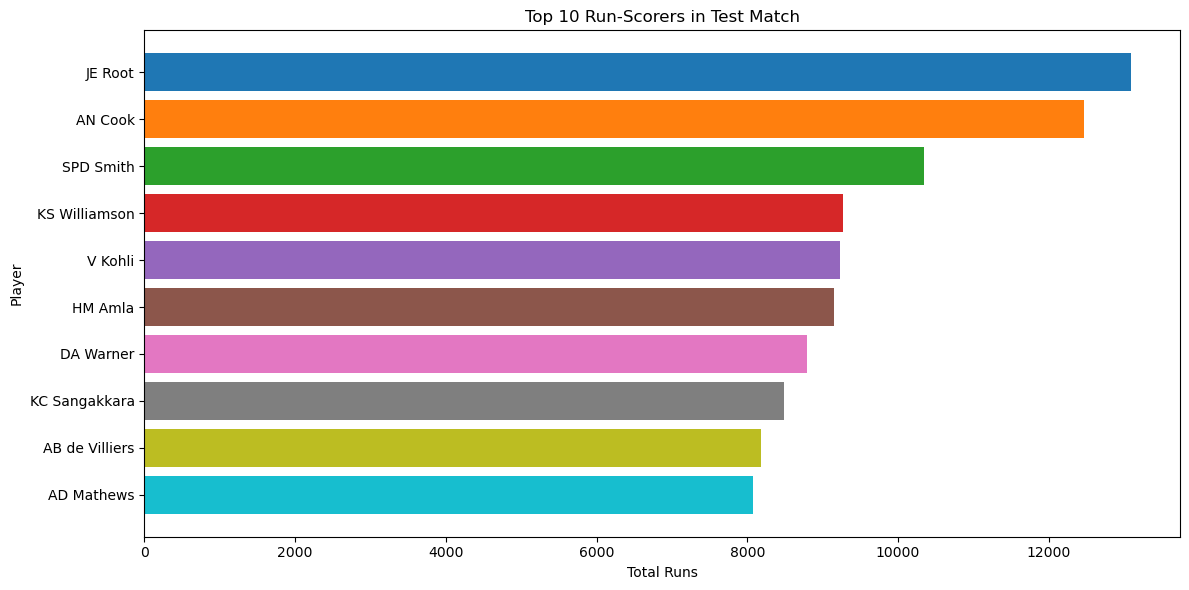

In [48]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(12,6))
plt.barh(test_top_scorers["Player"], test_top_scorers["Total Runs"], color=colors)
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.title("Top 10 Run-Scorers in Test Match")
plt.gca().invert_yaxis()  # Highest scorer on top
plt.tight_layout()
plt.show()

In [18]:
!pip install pymysql

  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)


In [61]:
import pymysql

In [62]:
#Connecting mysql
conn_mysql = pymysql.connect(
host="localhost",
user="root",
password="Temple123"
)

In [63]:
cursor_mysql = conn_mysql.cursor()

In [64]:
#Create database if it doesn't exist
cursor_mysql.execute("CREATE DATABASE IF NOT EXISTS Cricket;")

1

In [65]:
cursor_mysql.execute("USE Cricket;")  # Select database
cursor_mysql.execute("""
    CREATE TABLE IF NOT EXISTS ipl_data (
        match_type VARCHAR(10),
        match_date DATE,
        match_between VARCHAR(100),
        batter VARCHAR(50),
        bowler VARCHAR(50),
        non_striker VARCHAR(50),
        runs_batter INT,
        runs_extras INT,
        runs_total INT,
        legbyes INT,
        wides INT,
        wickets VARCHAR(10),
        match_winner VARCHAR (50),
        win_by_runs INT,
        win_by_wickets INT
    );
""")
conn_mysql.commit()
print("Table 'ipl_data' created successfully in MySQL!")

Table 'ipl_data' created successfully in MySQL!


In [66]:
cursor_mysql.execute("""
    CREATE TABLE IF NOT EXISTS odi_data (
        match_type VARCHAR(10),
        match_date DATE,
        match_between VARCHAR(100),
        batter VARCHAR(50),
        bowler VARCHAR(50),
        non_striker VARCHAR(50),
        runs_batter INT,
        runs_extras INT,
        runs_total INT,
        legbyes INT,
        wides INT,
        wickets VARCHAR(10),
        match_winner VARCHAR (50),
        win_by_runs INT,
        win_by_wickets INT
    );
""")
conn_mysql.commit()
print("Table 'odi_data' created successfully in MySQL!")

Table 'odi_data' created successfully in MySQL!


In [68]:
cursor_mysql.execute("""
    CREATE TABLE IF NOT EXISTS t20_data (
        match_type VARCHAR(10),
        match_date DATE,
        match_between VARCHAR(100),
        batter VARCHAR(50),
        bowler VARCHAR(50),
        non_striker VARCHAR(50),
        runs_batter INT,
        runs_extras INT,
        runs_total INT,
        legbyes INT,
        wides INT,
        wickets VARCHAR(10),
        match_winner VARCHAR (50),
        win_by_runs INT,
        win_by_wickets INT
    );
""")
conn_mysql.commit()
print("Table 't20_data' created successfully in MySQL!")

Table 't20_data' created successfully in MySQL!


In [67]:
cursor_mysql.execute("""
    CREATE TABLE IF NOT EXISTS test_data (
        match_type VARCHAR(10),
        match_date DATE,
        match_between VARCHAR(100),
        batter VARCHAR(50),
        bowler VARCHAR(50),
        non_striker VARCHAR(50),
        runs_batter INT,
        runs_extras INT,
        runs_total INT,
        legbyes INT,
        wides INT,
        wickets VARCHAR(10),
        match_winner VARCHAR (50),
        win_by_runs INT,
        win_by_wickets INT
    );
""")
conn_mysql.commit()
print("Table 'test_data' created successfully in MySQL!")

Table 'test_data' created successfully in MySQL!


In [69]:
cursor_mysql.execute
QUERY ="""
    INSERT INTO ipl_data (
        match_type,
        match_date,
        match_between,
        batter,
        bowler,
        non_striker,
        runs_batter,
        runs_extras,
        runs_total,
        legbyes,
        wides,
        wickets,
        match_winner,
        win_by_runs,
        win_by_wickets
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) 
"""
data1 = ipl_df.values.tolist()
cursor_mysql.executemany(QUERY, data1)
conn_mysql.commit()
print("insert 1")

insert 1


In [70]:
cursor_mysql.execute
QUERY ="""
    INSERT INTO odi_data (
        match_type,
        match_date,
        match_between,
        batter,
        bowler,
        non_striker,
        runs_batter,
        runs_extras,
        runs_total,
        legbyes,
        wides,
        wickets,
        match_winner,
        win_by_runs,
        win_by_wickets
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) 
"""
data2 = odi_df.values.tolist()
cursor_mysql.executemany(QUERY, data2)
conn_mysql.commit()
print("insert 2")

insert 2


In [72]:
cursor_mysql.execute
QUERY ="""
    INSERT INTO test_data (
        match_type,
        match_date,
        match_between,
        batter,
        bowler,
        non_striker,
        runs_batter,
        runs_extras,
        runs_total,
        legbyes,
        wides,
        wickets,
        match_winner,
        win_by_runs,
        win_by_wickets
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) 
"""
data4 = test_df.values.tolist()
cursor_mysql.executemany(QUERY, data4)
conn_mysql.commit()
print("insert 4")

insert 4


In [73]:
cursor_mysql.execute
QUERY ="""
    INSERT INTO t20_data (
        match_type,
        match_date,
        match_between,
        batter,
        bowler,
        non_striker,
        runs_batter,
        runs_extras,
        runs_total,
        legbyes,
        wides,
        wickets,
        match_winner,
        win_by_runs,
        win_by_wickets
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s) 
"""
data3 = t20_df.values.tolist()
cursor_mysql.executemany(QUERY, data3)
conn_mysql.commit()
print("insert 3")

insert 3
